In [1]:
from SINDy import *
import numpy as np
%matplotlib inline

In [2]:
data  = np.array([[1,.2,3],[3,4,5]])
ddata = np.array([[1,2,3],[3,4,5]])

In [3]:
sindy = SINDy(data=data,polyorder=1,usesine=False,cutoff=.5)
sindy.setDerivative(ddata)

[[ 0.2  3. ]
 [ 4.   5. ]]
[ 1.  3.]
Initiated a class for Sparse Identification from Numerical Dynamics
**** Derivative Set ****


In [4]:
sindy.RunSINDy()

**** Candidate functions library has been created ****
**** Performing regression. Please wait... ****
	Iteration 0 in progress...
	Iteration 1 in progress...
	Iteration 2 in progress...
	Iteration 3 in progress...
	Iteration 4 in progress...
	Iteration 5 in progress...
	Iteration 6 in progress...
	Iteration 7 in progress...
	Iteration 8 in progress...
	Iteration 9 in progress...
**** Identification is complete. We now use it to simulate the system. ****
True
[ 1.  3.]
(3.0, array([ 13.21461206,  20.56181555]))


SINDy.py:105: UserWarning: The number of state symbols don't match the state dimension.
  warnings.warn("The number of state symbols don't match the state dimension.")


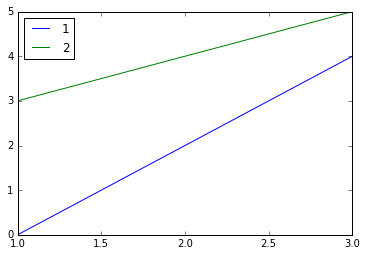

In [5]:
sindy.SINDyPlot()

# Try an example

In [6]:
from SIR import *

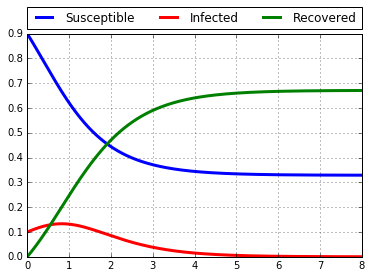

In [7]:
sir = SIR(tstart=0, tend=8, dt=.001, beta=3, gamma=2, N=1)
sir.Initialize(S0=0.9, I0=0.1, R0=0);
sir.Simulate();
sir.PlotSIR(1)

In [17]:
data  = np.transpose(np.array([sir._Time, sir._SS, sir._II, sir._RR]))
ddata = np.transpose(np.array([sir._Time, sir._dSS, sir._dII, sir._dRR]))

In [ ]:
sin = SINDy(data=data,polyorder=2,usesine=False)
sin.setDerivative(ddata)

In [ ]:
sin.RunSINDy()

In [ ]:
sindy.SINDyPlot(statesymbols=["S","I","R"])